In [1]:
import sklearn                                         
import numpy as np                                     
import pandas as pd
import plotly as plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score



In [2]:
df = pd.read_csv('fishing_vessels_v1.csv')                    


df


,mmsi,flag,geartype,length,tonnage,engine_power,active_2012,active_2013,active_2014,active_2015,active_2016
0,603100157,AGO,trawlers,32.808468,299.003814,733.826977,False,False,False,True,True
1,603100137,AGO,trawlers,34.568782,395.683171,864.960188,False,False,False,True,True
2,603100161,AGO,trawlers,28.822140,263.849149,651.809642,False,False,False,True,True
3,603100174,AGO,trawlers,30.721429,299.700916,703.796086,False,False,False,True,True
4,603100164,AGO,trawlers,37.479248,405.967747,850.976640,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
73004,601764000,ZAF,drifting_longlines,17.032258,52.550920,207.818629,False,True,True,True,True
73005,601089100,ZAF,drifting_longlines,22.915622,180.506028,527.507463,False,False,False,True,True
73006,601849000,ZAF,drifting_longlines,19.692080,86.485661,362.553279,False,False,True,True,True
73007,601183700,ZAF,drifting_longlines,31.872860,307.446773,977.330342,False,False,True,True,True


In [3]:
df.info()                                           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73009 entries, 0 to 73008
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mmsi          73009 non-null  int64  
 1   flag          73009 non-null  object 
 2   geartype      73006 non-null  object 
 3   length        73007 non-null  float64
 4   tonnage       73007 non-null  float64
 5   engine_power  72999 non-null  float64
 6   active_2012   73009 non-null  bool   
 7   active_2013   73009 non-null  bool   
 8   active_2014   73009 non-null  bool   
 9   active_2015   73009 non-null  bool   
 10  active_2016   73009 non-null  bool   
dtypes: bool(5), float64(3), int64(1), object(2)
memory usage: 3.7+ MB


In [4]:
df["active_2012"] = df["active_2012"].astype(int)
df["active_2013"] = df["active_2013"].astype(int)
df["active_2014"] = df["active_2014"].astype(int)
df["active_2015"] = df["active_2015"].astype(int)
df["active_2016"] = df["active_2016"].astype(int)



df

,mmsi,flag,geartype,length,tonnage,engine_power,active_2012,active_2013,active_2014,active_2015,active_2016
0,603100157,AGO,trawlers,32.808468,299.003814,733.826977,0,0,0,1,1
1,603100137,AGO,trawlers,34.568782,395.683171,864.960188,0,0,0,1,1
2,603100161,AGO,trawlers,28.822140,263.849149,651.809642,0,0,0,1,1
3,603100174,AGO,trawlers,30.721429,299.700916,703.796086,0,0,0,1,1
4,603100164,AGO,trawlers,37.479248,405.967747,850.976640,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
73004,601764000,ZAF,drifting_longlines,17.032258,52.550920,207.818629,0,1,1,1,1
73005,601089100,ZAF,drifting_longlines,22.915622,180.506028,527.507463,0,0,0,1,1
73006,601849000,ZAF,drifting_longlines,19.692080,86.485661,362.553279,0,0,1,1,1
73007,601183700,ZAF,drifting_longlines,31.872860,307.446773,977.330342,0,0,1,1,1


## Data Preprocessing

In [5]:
correlation = df.corr()

correlation

,mmsi,length,tonnage,engine_power,active_2012,active_2013,active_2014,active_2015,active_2016
mmsi,1.000000,0.022395,-0.039385,-0.038966,0.001724,-0.010939,-0.083691,-0.114199,-0.179723
length,0.022395,1.000000,0.757891,0.778176,0.166820,0.073046,0.042517,0.023754,-0.001300
tonnage,-0.039385,0.757891,1.000000,0.834118,0.119757,0.040279,0.027367,0.024601,0.006423
engine_power,-0.038966,0.778176,0.834118,1.000000,0.129537,0.035901,0.017371,0.015624,0.000365
active_2012,0.001724,0.166820,0.119757,0.129537,1.000000,0.531875,0.288414,0.096478,-0.114359
active_2013,-0.010939,0.073046,0.040279,0.035901,0.531875,1.000000,0.545886,0.207062,-0.156166
active_2014,-0.083691,0.042517,0.027367,0.017371,0.288414,0.545886,1.000000,0.494230,0.014179
active_2015,-0.114199,0.023754,0.024601,0.015624,0.096478,0.207062,0.494230,1.000000,0.300987
active_2016,-0.179723,-0.001300,0.006423,0.000365,-0.114359,-0.156166,0.014179,0.300987,1.000000


In [6]:
df.isnull().sum()

mmsi             0
flag             0
geartype         3
length           2
tonnage          2
engine_power    10
active_2012      0
active_2013      0
active_2014      0
active_2015      0
active_2016      0
dtype: int64

In [7]:
df['tonnage'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
73004    False
73005    False
73006    False
73007    False
73008    False
Name: tonnage, Length: 73009, dtype: bool

In [8]:
df['tonnage'].isnull().sum()

2

In [9]:
df['engine_power'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
73004    False
73005    False
73006    False
73007    False
73008    False
Name: engine_power, Length: 73009, dtype: bool

In [10]:
df['engine_power'].isnull().sum()

10

In [11]:
df.fillna(df.mean(), inplace=True)

In [12]:
df['tonnage'].isnull().sum()

0

In [13]:
df['engine_power'].isnull().sum()

0

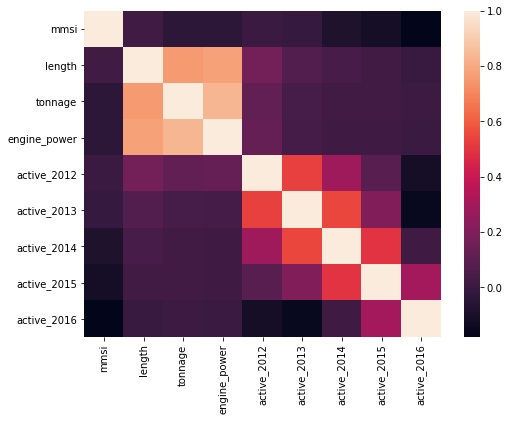

In [14]:
# Heatmap

# numeric_columns=['mmsi','length','tonnage','engine_power']
# sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
sns.heatmap(correlation)

fig=plt.gcf()                                       
fig.set_size_inches(8,6)                            
plt.show()

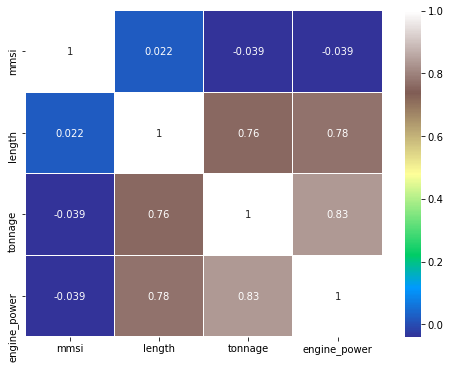

In [15]:
numeric_columns=['mmsi','length','tonnage','engine_power']
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)


fig=plt.gcf()                                       
fig.set_size_inches(8,6)                            
plt.show()

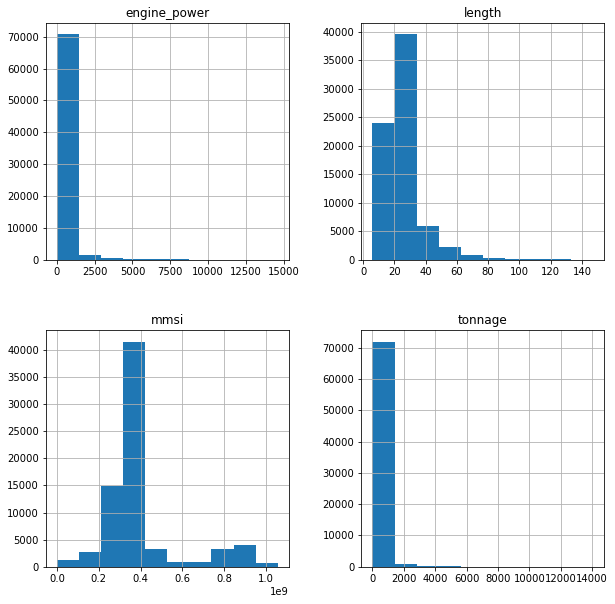

In [16]:
# Histogram


df[numeric_columns].hist(figsize=(10,10))
plt.show()

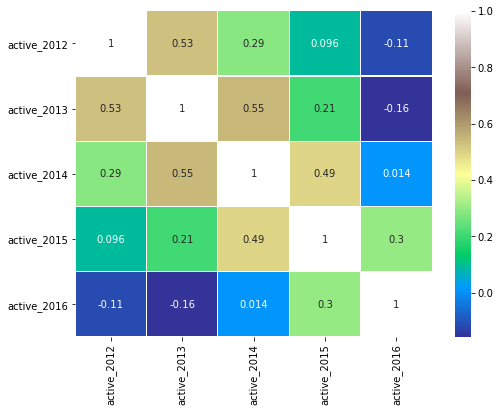

In [17]:
numeric_columns=['active_2012','active_2013','active_2014','active_2015', 'active_2016']
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)


fig=plt.gcf()                                       
fig.set_size_inches(8,6)                            
plt.show()

## Model Building

In [18]:
x, y = df.loc[:, 'active_2012':'active_2015'], df.loc[:,'active_2016']

In [19]:
print(x) 

       active_2012  active_2013  active_2014  active_2015
0                0            0            0            1
1                0            0            0            1
2                0            0            0            1
3                0            0            0            1
4                0            0            0            1
...            ...          ...          ...          ...
73004            0            1            1            1
73005            0            0            0            1
73006            0            0            1            1
73007            0            0            1            1
73008            0            0            0            0

[73009 rows x 4 columns]


In [20]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
73004    1
73005    1
73006    1
73007    1
73008    1
Name: active_2016, Length: 73009, dtype: int32


In [21]:
x.shape

(73009, 4)

In [22]:
y.shape

(73009,)

## Model Training

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [24]:
x_test

,active_2012,active_2013,active_2014,active_2015
53803,1,1,1,1
72471,0,0,1,1
41263,1,1,1,1
15967,1,1,1,1
46511,1,1,1,1
...,...,...,...,...
47238,0,0,1,0
6667,1,1,1,1
26271,0,1,1,1
71981,0,0,0,1


In [25]:
y_test

53803    1
72471    1
41263    1
15967    1
46511    0
        ..
47238    0
6667     1
26271    1
71981    1
70933    1
Name: active_2016, Length: 21903, dtype: int32

## Decision Tree Algorithm

In [41]:
# Using Decision Tree

Catagory=['Sorry, Your ship will be innactive in 2016','Congratulations, Your ship will be active in 2016']

In [42]:
dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
prediction = dt.predict(x_test) 

In [44]:
accuracy_dt=accuracy_score(y_test,prediction)*100

#Checking the accuracy by comparing the x_test prediciton result with y_test 
accuracy_dt

88.58603844222253

In [45]:
print("Accuracy on training set: {:.3f}".format(dt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(x_test, y_test)))

Accuracy on training set: 0.883
Accuracy on test set: 0.886


In [46]:
y_test

53803    1
72471    1
41263    1
15967    1
46511    0
        ..
47238    0
6667     1
26271    1
71981    1
70933    1
Name: active_2016, Length: 21903, dtype: int32

In [47]:
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
x_DT=np.array([[1, 1, 1, 1]]) 

x_DT_prediction=dt.predict(x_DT)                        

print(x_DT_prediction)
print(x_DT_prediction[0])

[1]
1


In [49]:
print(Catagory[int(x_DT_prediction[0])])

Congratulations, Your ship will be active in 2016
